In [68]:
import numpy as np
from sklearn.cluster import MiniBatchKMeans, SpectralClustering
from sklearn.datasets import make_blobs, make_moons, make_circles
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(214)
X_moons, _ = make_moons(n_samples=350, noise=0.1, random_state=214)
X_blobs, _ = make_blobs(n_samples=50, centers=[[-0.5,-0.5]], cluster_std=[0.1], random_state=214)
X_noise = np.random.uniform(low=-1.5, high=2.0, size=(100,2))
X_vectors = np.vstack([X_moons, X_blobs, X_noise])

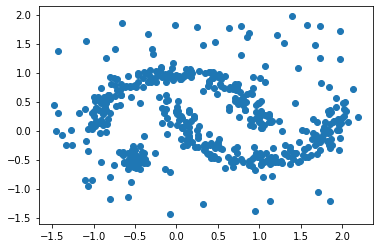

In [16]:
plt.scatter(X_vectors[:,0], X_vectors[:,1]);

In [17]:
NUM_CLUSTERS = 32
MIN_PROB = 0.6

In [80]:
cluster_list = NUM_CLUSTERS*[MiniBatchKMeans(n_clusters=16, batch_size=64, n_init=1, max_iter=30)]

In [81]:
cluster_preds = []
for cluster_instance in cluster_list:
    preds = cluster_instance.fit_predict(X_vectors)
    cluster_preds.append(preds)

In [82]:
cluster_preds = np.stack(cluster_preds).T

In [83]:
cluster_sim_mat = np.dot(cluster_preds, cluster_preds.T)/(np.linalg.norm(cluster_preds, axis=1)**2)
cluster_sim_mat = (cluster_sim_mat > MIN_PROB).astype(np.int)

C:\Users\tanma\AppData\Local\Temp\ipykernel_14468\3721383574.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cluster_sim_mat = (cluster_sim_mat > MIN_PROB).astype(np.int)


In [84]:
aggregator_clt = SpectralClustering(n_clusters=3, affinity="precomputed")

In [85]:
agg_preds = aggregator_clt.fit_predict(cluster_sim_mat)

C:\Users\tanma\miniconda3\envs\dl\lib\site-packages\sklearn\manifold\_spectral_embedding.py:233: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


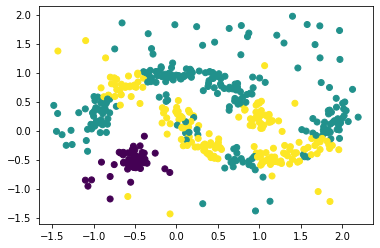

In [86]:
plt.scatter(X_vectors[:,0], X_vectors[:,1], c=agg_preds);